In [11]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("../data/resumes/sample_resumes.csv")
df.head()


,ID,Resume_str,Category
0,1,Machine learning engineer with strong experien...,Data Science
1,2,"Software engineer skilled in Java, Python, dat...",Software Engineering
2,3,Data scientist with hands-on experience in exp...,Data Science
3,4,"AI engineer with experience in deep learning, ...",Artificial Intelligence
4,5,Computer science graduate with knowledge of da...,Software Engineering


In [13]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          5 non-null      int64 
 1   Resume_str  5 non-null      object
 2   Category    5 non-null      object
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes


,ID
count,5.000000
mean,3.000000
std,1.581139
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [14]:
df['Resume_str'].apply(len).describe()


count      5.00000
mean     162.80000
std        7.79102
min      154.00000
25%      157.00000
50%      164.00000
75%      165.00000
max      174.00000
Name: Resume_str, dtype: float64

In [15]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_resume'] = df['Resume_str'].apply(clean_text)
df[['Resume_str', 'clean_resume']].head()


,Resume_str,clean_resume
0,Machine learning engineer with strong experien...,machine learning engineer with strong experien...
1,"Software engineer skilled in Java, Python, dat...",software engineer skilled in java python data ...
2,Data scientist with hands-on experience in exp...,data scientist with hands on experience in exp...
3,"AI engineer with experience in deep learning, ...",ai engineer with experience in deep learning n...
4,Computer science graduate with knowledge of da...,computer science graduate with knowledge of da...


In [16]:
df['word_count'] = df['clean_resume'].apply(lambda x: len(x.split()))
df[['Category', 'word_count']]


,Category,word_count
0,Data Science,21
1,Software Engineering,21
2,Data Science,22
3,Artificial Intelligence,20
4,Software Engineering,21


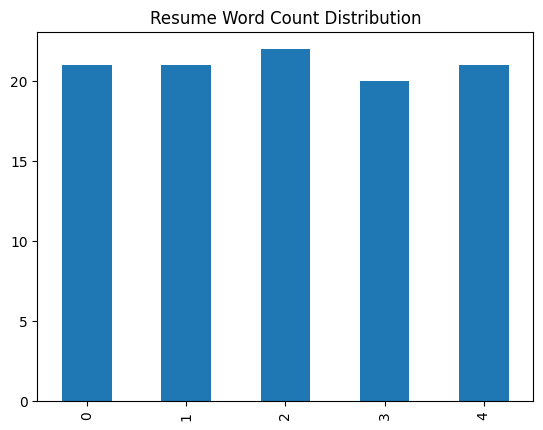

In [17]:
df['word_count'].plot(kind='bar', title='Resume Word Count Distribution')
plt.show()
